In [4]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import time
import os
import sys
import numpy as np
sys.stdout.flush()

mpl.rcParams["figure.figsize"] = (8, 5)
mpl.rcParams["savefig.bbox"] = 'tight'
mpl.rcParams["font.size"] = 18

def finiteDiff_3D(data, dim, order, dlt, cap = None):  
    # compute the central difference derivatives for given input and dimensions
    res = np.zeros(data.shape)
    l = len(data.shape)
    if l == 3:
        if order == 1:                    # first order derivatives
            
            if dim == 0:                  # to first dimension

                res[1:-1,:,:] = (1 / (2 * dlt)) * (data[2:,:,:] - data[:-2,:,:])
                res[-1,:,:] = (1 / dlt) * (data[-1,:,:] - data[-2,:,:])
                res[0,:,:] = (1 / dlt) * (data[1,:,:] - data[0,:,:])

            elif dim == 1:                # to second dimension

                res[:,1:-1,:] = (1 / (2 * dlt)) * (data[:,2:,:] - data[:,:-2,:])
                res[:,-1,:] = (1 / dlt) * (data[:,-1,:] - data[:,-2,:])
                res[:,0,:] = (1 / dlt) * (data[:,1,:] - data[:,0,:])

            elif dim == 2:                # to third dimension

                res[:,:,1:-1] = (1 / (2 * dlt)) * (data[:,:,2:] - data[:,:,:-2])
                res[:,:,-1] = (1 / dlt) * (data[:,:,-1] - data[:,:,-2])
                res[:,:,0] = (1 / dlt) * (data[:,:,1] - data[:,:,0])

            else:
                raise ValueError('wrong dim')
                
        elif order == 2:
            
            if dim == 0:                  # to first dimension

                res[1:-1,:,:] = (1 / dlt ** 2) * (data[2:,:,:] + data[:-2,:,:] - 2 * data[1:-1,:,:])
                res[-1,:,:] = (1 / dlt ** 2) * (data[-1,:,:] + data[-3,:,:] - 2 * data[-2,:,:])
                res[0,:,:] = (1 / dlt ** 2) * (data[2,:,:] + data[0,:,:] - 2 * data[1,:,:])

            elif dim == 1:                # to second dimension

                res[:,1:-1,:] = (1 / dlt ** 2) * (data[:,2:,:] + data[:,:-2,:] - 2 * data[:,1:-1,:])
                res[:,-1,:] = (1 / dlt ** 2) * (data[:,-1,:] + data[:,-3,:] - 2 * data[:,-2,:])
                res[:,0,:] = (1 / dlt ** 2) * (data[:,2,:] + data[:,0,:] - 2 * data[:,1,:])

            elif dim == 2:                # to third dimension

                res[:,:,1:-1] = (1 / dlt ** 2) * (data[:,:,2:] + data[:,:,:-2] - 2 * data[:,:,1:-1])
                res[:,:,-1] = (1 / dlt ** 2) * (data[:,:,-1] + data[:,:,-3] - 2 * data[:,:,-2])
                res[:,:,0] = (1 / dlt ** 2) * (data[:,:,2] + data[:,:,0] - 2 * data[:,:,1])

            else:
                raise ValueError('wrong dim')
            
        else:
            raise ValueError('wrong order')
    elif l == 2:
        if order == 1:                    # first order derivatives
            
            if dim == 0:                  # to first dimension

                res[1:-1,:] = (1 / (2 * dlt)) * (data[2:,:] - data[:-2,:])
                res[-1,:] = (1 / dlt) * (data[-1,:] - data[-2,:])
                res[0,:] = (1 / dlt) * (data[1,:] - data[0,:])

            elif dim == 1:                # to second dimension

                res[:,1:-1] = (1 / (2 * dlt)) * (data[:,2:] - data[:,:-2])
                res[:,-1] = (1 / dlt) * (data[:,-1] - data[:,-2])
                res[:,0] = (1 / dlt) * (data[:,1] - data[:,0])

            else:
                raise ValueError('wrong dim')
                
        elif order == 2:
            
            if dim == 0:                  # to first dimension

                res[1:-1,:] = (1 / dlt ** 2) * (data[2:,:] + data[:-2,:] - 2 * data[1:-1,:])
                res[-1,:] = (1 / dlt ** 2) * (data[-1,:] + data[-3,:] - 2 * data[-2,:])
                res[0,:] = (1 / dlt ** 2) * (data[2,:] + data[0,:] - 2 * data[1,:])

            elif dim == 1:                # to second dimension

                res[:,1:-1] = (1 / dlt ** 2) * (data[:,2:] + data[:,:-2] - 2 * data[:,1:-1])
                res[:,-1] = (1 / dlt ** 2) * (data[:,-1] + data[:,-3] - 2 * data[:,-2])
                res[:,0] = (1 / dlt ** 2) * (data[:,2] + data[:,0] - 2 * data[:,1])

            else:
                raise ValueError('wrong dim')
            
        else:
            raise ValueError('wrong order')

            
    else:
        raise ValueError("Dimension NOT supported")
        
    if cap is not None:
        res[res < cap] = cap
    return res


In [9]:
with open("model_result", "rb") as f:
   res = pickle.load(f)

F_init = res["F_init"]
a_star = res["a_star"]
c_star = res["c_star"]

# error = np.sum(F_init[:,0,0]-F_init[:,1,1],axis=0)

F = F_init[:, 0, 0]
a = a_star[:, 0, 0]
c = c_star[:, 0, 0]

W1_min = 0.0
W1_max = 1.0
hW1 = 0.005
W1 = np.arange(W1_min,W1_max+hW1,hW1)
nW1 = len(W1)


dFdW1 = finiteDiff_3D(F_init, 0, 1, hW1)
ddFddW1 = finiteDiff_3D(F_init, 0, 2, hW1)


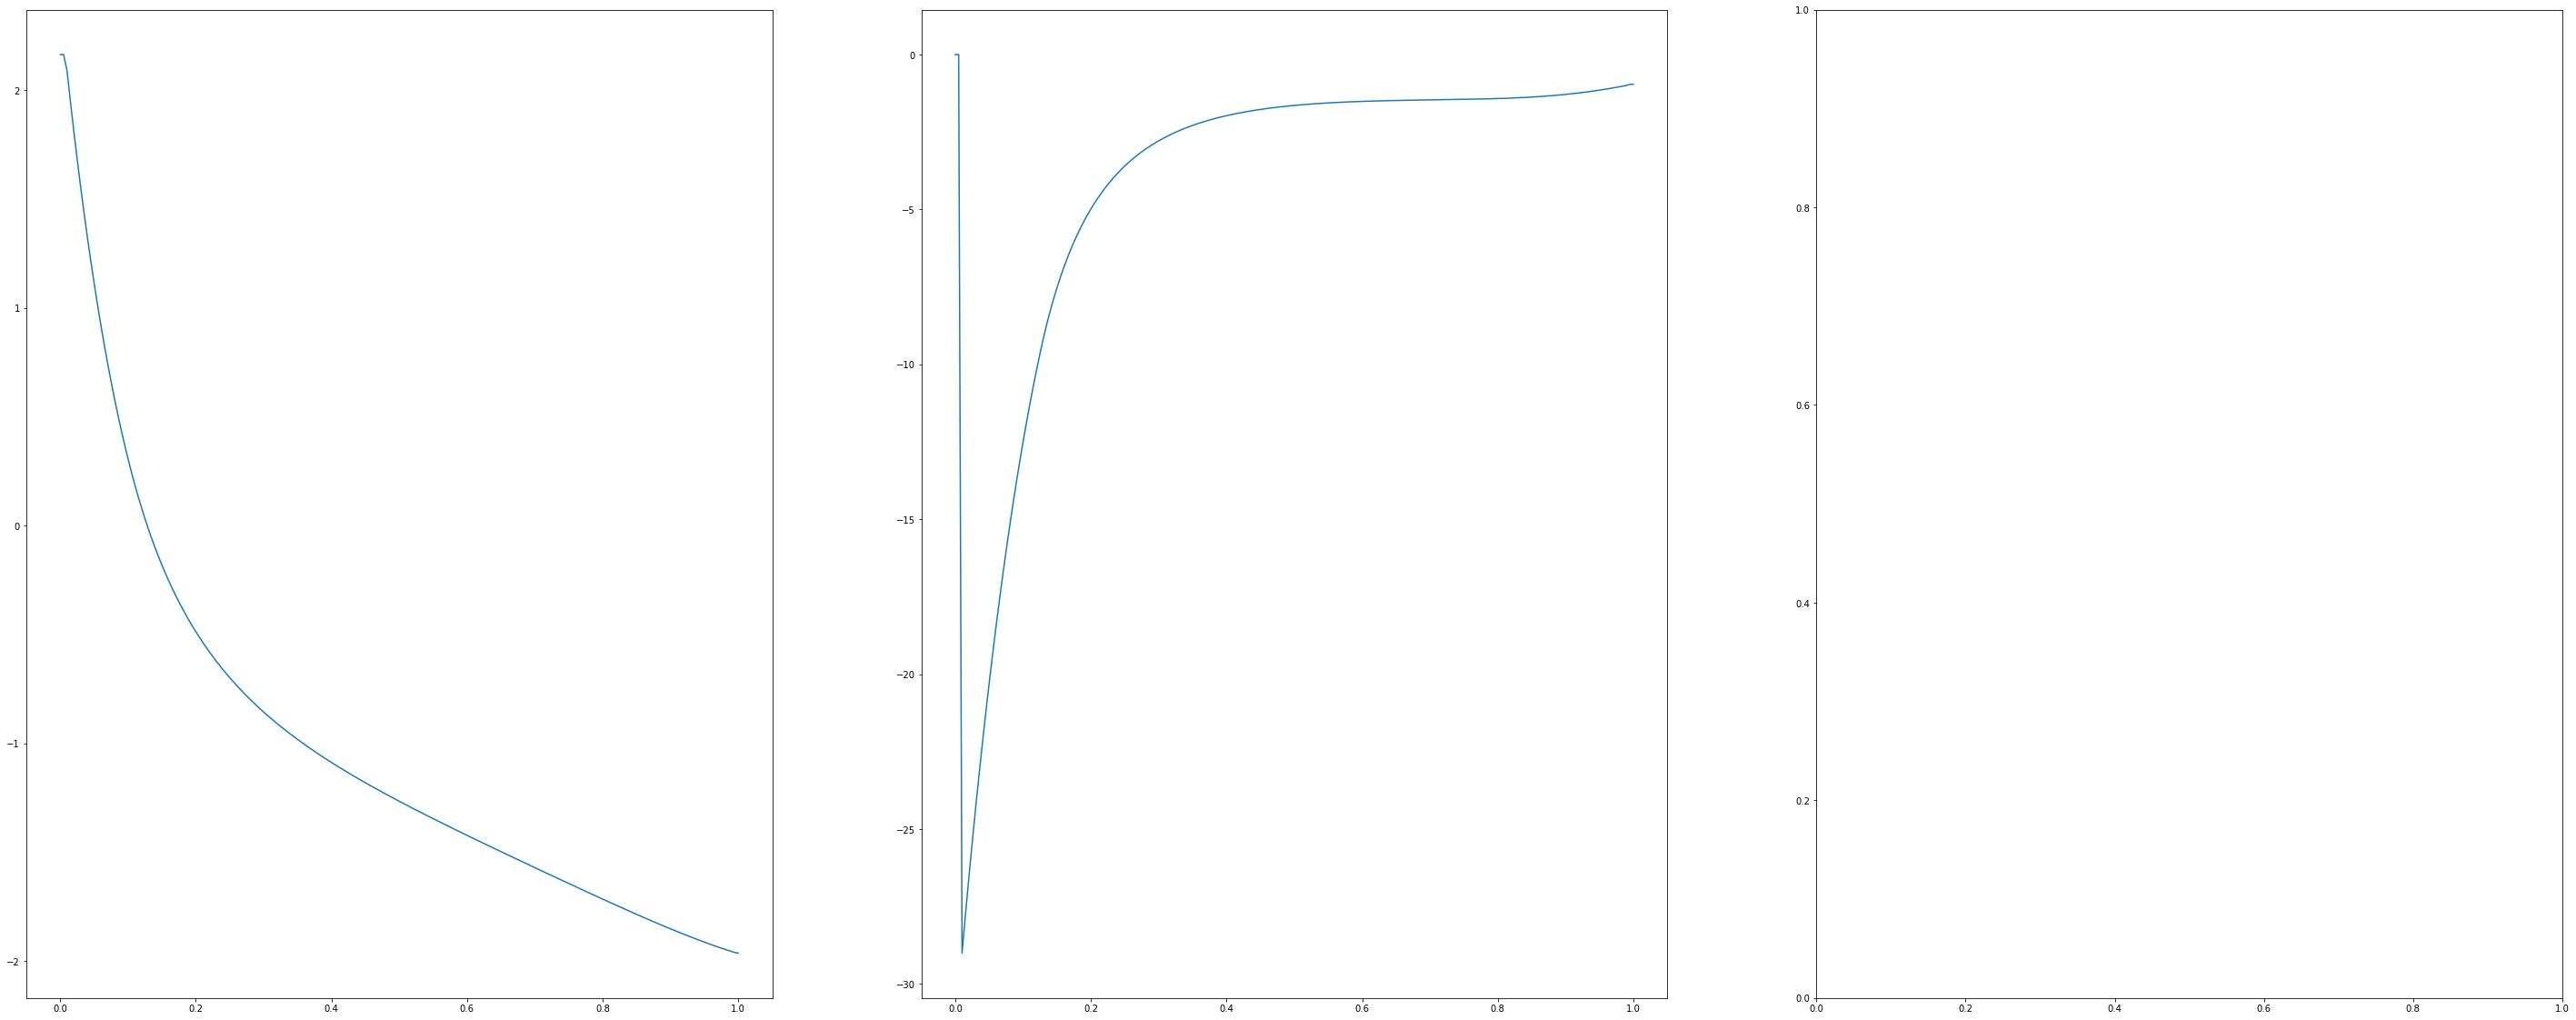

In [12]:


plt.subplots(1, 3, figsize=(50, 20))
plt.subplot(131)
plt.plot(W1, dFdW1[:, 0, 0])
plt.subplot(132)
plt.plot(W1, ddFddW1[:, 0, 0])
